In [30]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

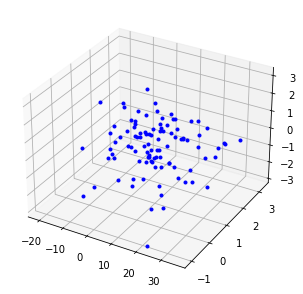

In [38]:
X_orignal = np.random.normal(10,10,100)
Y_orignal = np.random.normal(1,1,100)
Z_orignal = np.random.normal(0,1,100)
MatX = np.matrix([X_orignal,Y_orignal,Z_orignal])
plt.figure(figsize=(5,6))
ax=plt.axes(projection='3d')
ax.plot3D(X_orignal,Y_orignal,Z_orignal,'.',color='b')
plt.show()

In [45]:
MatX = np.matrix([X_orignal,Y_orignal,Z_orignal])
rotateMatrix = np.matrix([[1,0,1],[1,1,0],[0,0,1]])
MatX = np.matmul(rotateMatrix,MatX)
MatX.shape

(3, 100)

## 将原始数据点进行翻转 ----->沿y轴选择45度

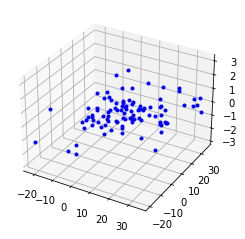

In [64]:
ax2=plt.axes(projection='3d')
ax2.plot3D(np.array(MatX[0]).flatten(),np.array(MatX[1]).flatten(),np.array(MatX[2]).flatten(),'.',color='b')
plt.show()

### 寻找新的坐标系点来表示翻转后的数据

In [93]:
MatX_ = MatX.T * math.sqrt(MatX.shape[1]-1)
# 进行svd分解
newMat = np.matmul(MatX_.T,MatX_)
eigenvalue,eigenvector = np.linalg.eig(newMat)
eigenvalue= np.sqrt(eigenvalue)
eigenvalue,eigenvector

(array([2084.79135064,  145.20931414,   63.15570085]),
 matrix([[-6.89714479e-01, -5.27127422e-01, -4.96417786e-01],
         [-7.24081365e-01,  5.02429332e-01,  4.72515548e-01],
         [-3.38953842e-04, -6.85347683e-01,  7.28215928e-01]]))

In [98]:
Lamda = eigenvalue.tolist()
alpha = eigenvector.T.tolist()
feature = list(zip(Lamda,alpha))
#从大到小进行排序找出第一主成分，第二主成分.....
feature.sort(key=lambda x:x[0],reverse=True)
feature

[(2084.7913506449277,
  [-0.6897144788997014, -0.7240813647004084, -0.00033895384239851023]),
 (145.20931414285008,
  [-0.527127422304689, 0.5024293323302075, -0.6853476830548388]),
 (63.155700851563374,
  [-0.4964177859933377, 0.4725155482180619, 0.7282159284454423])]

In [101]:
## 计算方差贡献率
Lambda_list =[i[0] for i in feature]
edaList = [i/sum(Lambda_list) for i in Lambda_list]
edaList

[0.9091361504533424, 0.06332290127209234, 0.02754094827456536]

In [103]:
#计算Y矩阵
V = eigenvector
Y = np.matmul(V.T,MatX)
Y.shape

(3, 100)

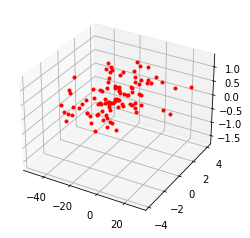

In [106]:
ax2=plt.axes(projection='3d')
ax2.plot3D(np.array(Y[0]).flatten(),np.array(Y[1]).flatten(),np.array(Y[2]).flatten(),'.',color='r')
plt.show()

#### 16.1，16.2，16.3

In [107]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [109]:
#16.1
X = np.array([[2,3,3,4,5,7],[2,4,5,5,6,8]])
n = X.shape[1]
newX = X/math.sqrt(n-1)
eigenvalue,eigenvector = np.linalg.eig(np.matmul(newX.T,newX))
eigenvalue,eigenvector

(array([ 5.62071419e+01, -2.99458317e-16,  1.92858054e-01, -1.76410224e-15,
        -1.10661772e-16,  1.55095404e-15]),
 array([[-0.16780223, -0.93910533, -0.29987263,  0.12532898,  0.88400176,
          0.28641807],
        [-0.29804527, -0.00785862,  0.19139037,  0.50888988,  0.08579875,
          0.22036431],
        [-0.34438719, -0.20432417,  0.83258968,  0.05366628,  0.09476716,
         -0.20716057],
        [-0.38194638,  0.05501035,  0.04145406, -0.34777939,  0.06360129,
          0.7930707 ],
        [-0.46584749,  0.11787933, -0.10848226, -0.66594623,  0.09578296,
         -0.20453349],
        [-0.63364972,  0.24361728, -0.40835489,  0.39750319, -0.43471732,
         -0.39458039]]))

In [133]:
newFeature = list(zip(eigenvalue,eigenvector.T))
newFeature = sorted(newFeature,key=lambda x:x[0],reverse=True)

In [136]:
newFeature=np.array(newFeature)
newfeature = [[i,j] for index,(i,j) in enumerate(newFeature) if sum(newFeature[:index,0])/sum(newFeature[:,0])*100<=99.9999]

In [137]:
newfeature

[[56.207141946296474,
  array([-0.16780223, -0.29804527, -0.34438719, -0.38194638, -0.46584749,
         -0.63364972])],
 [0.19285805370351697,
  array([-0.29987263,  0.19139037,  0.83258968,  0.04145406, -0.10848226,
         -0.40835489])]]